In [1]:
%pylab inline
import pandas as pd
from scipy import io

import plotnine as p

Populating the interactive namespace from numpy and matplotlib


/Users/vale/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
grun_path = '/Users/vale/Google\ Drive/Research\ Projects/Finished/Power-analysis/Public\ data/SRP036633/SRP036633_counts.csv'
grun_path = grun_path.replace('\\', '')

counts = pd.read_csv(grun_path, index_col=0)
counts = counts.astype(int)

In [3]:
sample_info = pd.DataFrame({'total_count': counts.sum(0)})
sample_info['num_genes'] = (counts > 0).sum(0)

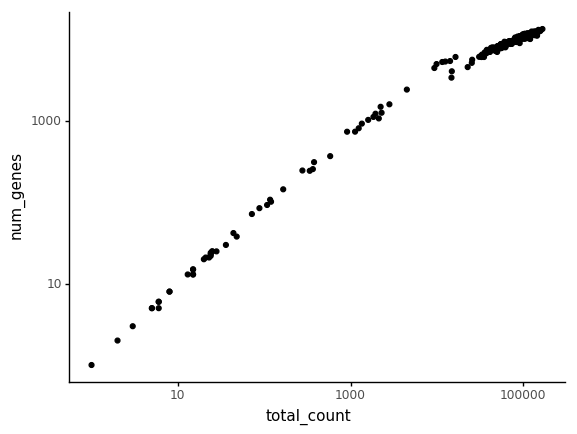

<ggplot: (-9223372036564406542)>

In [4]:
p.qplot('total_count', 'num_genes', sample_info, log='xy') + p.theme_classic()

In [5]:
counts = counts.T[((counts > 0).sum(0) > 5e3)].T

In [7]:
gene_info = pd.DataFrame(index=counts.index)

In [8]:
gene_info['mean_'] = counts.mean(1).values
gene_info['var_'] = counts.var(1).values
gene_info['is_spike'] = gene_info.index.str.startswith('ERCC-')

/Users/vale/anaconda/lib/python3.6/site-packages/plotnine/scales/scale.py:483: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


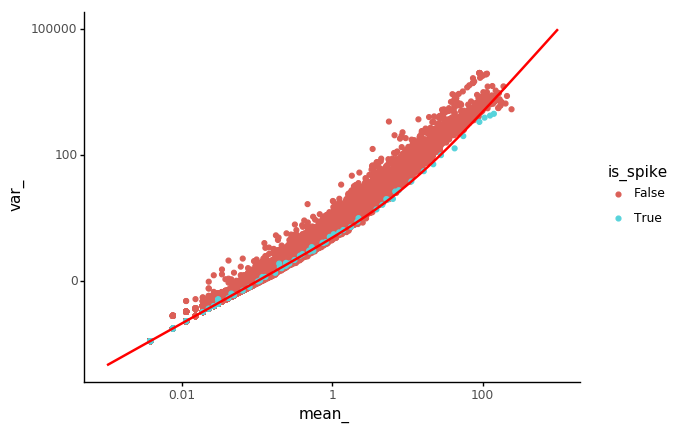

<ggplot: (294378504)>

In [10]:
xx = np.logspace(-3, 3)
yy = xx + 0.1 * xx ** 2
tmp = pd.DataFrame({'x': xx, 'y': yy})

p.qplot('mean_', 'var_', gene_info, color='is_spike', log='xy') + p.theme_classic() \
    + p.geom_line(p.aes('x', 'y'), tmp, color='red', size=1)

In [11]:
gene_info['fracdrop'] = (1 - (counts > 1).sum(1) / counts.shape[1]).values

/Users/vale/anaconda/lib/python3.6/site-packages/plotnine/scales/scale.py:483: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


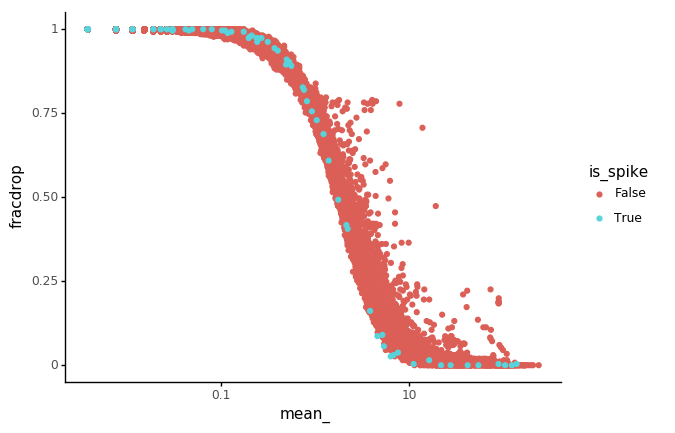

<ggplot: (298644835)>

In [12]:
p.qplot('mean_', 'fracdrop', gene_info, log='x', color='is_spike') + p.theme_classic()

In [41]:
idx = counts.pipe(np.log1p).var(1).sort_values(ascending=False).index[:500]

In [42]:
t_counts = counts.loc[idx].copy()

In [43]:
t_counts.columns = np.arange(t_counts.columns.shape[0])
t_counts.index = np.arange(t_counts.index.shape[0])

In [44]:
total_df = pd.DataFrame({'cell': t_counts.columns, 'total_count': counts.sum(0)})

In [45]:
t_counts['gene'] = t_counts.index.argsort()
t_counts_long = t_counts.melt(id_vars='gene', var_name='cell', value_name='expression')

In [46]:
tmp = t_counts_long.merge(total_df, on='cell')
tmp.to_csv('grun_sample_long_counts.csv')
tmp.head()

,gene,cell,expression,total_count
0,0,0,7,84858
1,1,0,6,84858
2,2,0,5,84858
3,3,0,6,84858
4,4,0,6,84858
